In [1]:
import pickle
import os
import numpy as np
import glob
from matplotlib import pyplot as plt

In [2]:
# experiment = 'IMDBBINARY-1612295759.2410278'
# experiment = 'IMDBBINARY-1612296285.688068'
# experiment = 'IMDBBINARY-1612297357.0188866'
# experiment = 'IMDBBINARY-1612308623.8727822'
# experiment = 'IMDBBINARY-1612309409.3840077'
# experiment = 'IMDBBINARY-1612367645.3994896'
# experiment = 'IMDBBINARY-1612362318.521652'
# experiment = 'IMDBBINARY-1612362047.7628844'
# experiment = 'IMDBBINARY-1612382937.7405002'
# experiment = 'IMDBBINARY-1612388205.3980188'
# experiment = 'IMDBBINARY-1612388076.835748'
# experiment = 'IMDBBINARY-1612392107.7732165'
# experiment = 'IMDBBINARY-1612398296.783769'
# experiment = 'IMDBBINARY-1612398239.095413'

In [86]:
root = './results/'
# experiment = 'IMDBB_base'
# experiment = 'IMDBB_nojk'
# experiment = 'IMDBB_decay10'
# experiment = 'IMDBB_GSNv'
# experiment = 'IMDBB_decay10_layers4_bs32'
# experiment = 'IMDBB_xfixed'
# experiment = 'IMDBM_xfixed'
experiment = 'RDTM_repr_baseline'

In [91]:
folder = glob.glob(os.path.join(root, experiment, 'REDDITMULTI5K*'))

In [92]:
folder

['./results/RDTM_repr_baseline/REDDITMULTI5K-1614427206.3816814']

In [94]:
curve_list = list()
# folder = glob.glob(os.path.join(root, experiment, experiment[:len('IMDBB')]+'*'))[0]
folder = glob.glob(os.path.join(root, experiment, 'REDDITMULTI5K*'))[0]
print(folder)
for fold in range(10):
    path = os.path.join(folder, 'fold-{}'.format(fold), 'curves.pkl')
    try:
        with open(path, 'rb') as handle:
            curves = pickle.load(handle)
            curve_list.append(curves)
    except FileNotFoundError:
        continue
print('Found {} result(s).'.format(len(curve_list)))

./results/RDTM_repr_baseline/REDDITMULTI5K-1614427206.3816814
Found 10 result(s).


In [95]:
def collect(curve_list, curve_name):
    return [[item for item in curves[curve_name]] for curves in curve_list]

def plot_curves(curves, ylim=None, agg=None, err_agg=None):
    plt.figure(dpi=300)
    if agg is not None:
        y_center = agg(np.asarray(curves), axis=0)
        if err_agg is not None:
            y_err = err_agg(np.asarray(curves), axis=0)
            plt.fill_between(range(len(curves[0])), y_center+y_err, y_center-y_err, alpha=0.2, color='cornflowerblue', linewidth=0.0)
        plt.plot(y_center, lw=0.5)
    else:
        for curve in curves:
            plt.plot(curve, lw=0.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()
    plt.close()

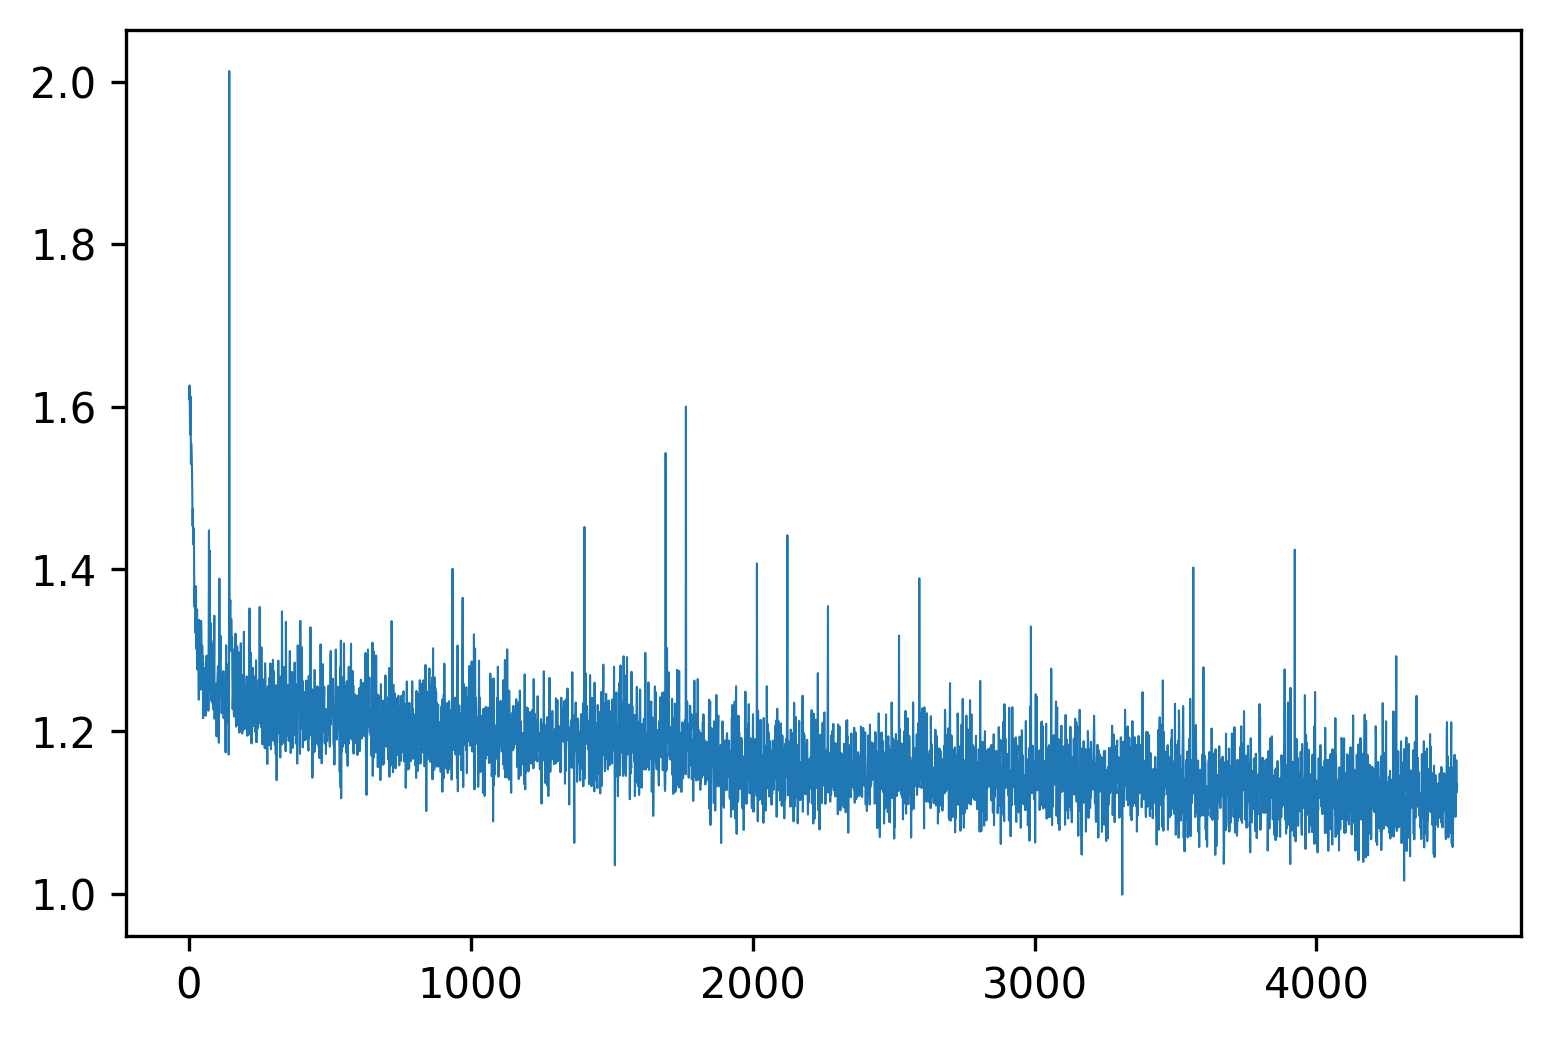

In [96]:
plot_curves(collect(curve_list, 'train_loss'), agg=np.mean)

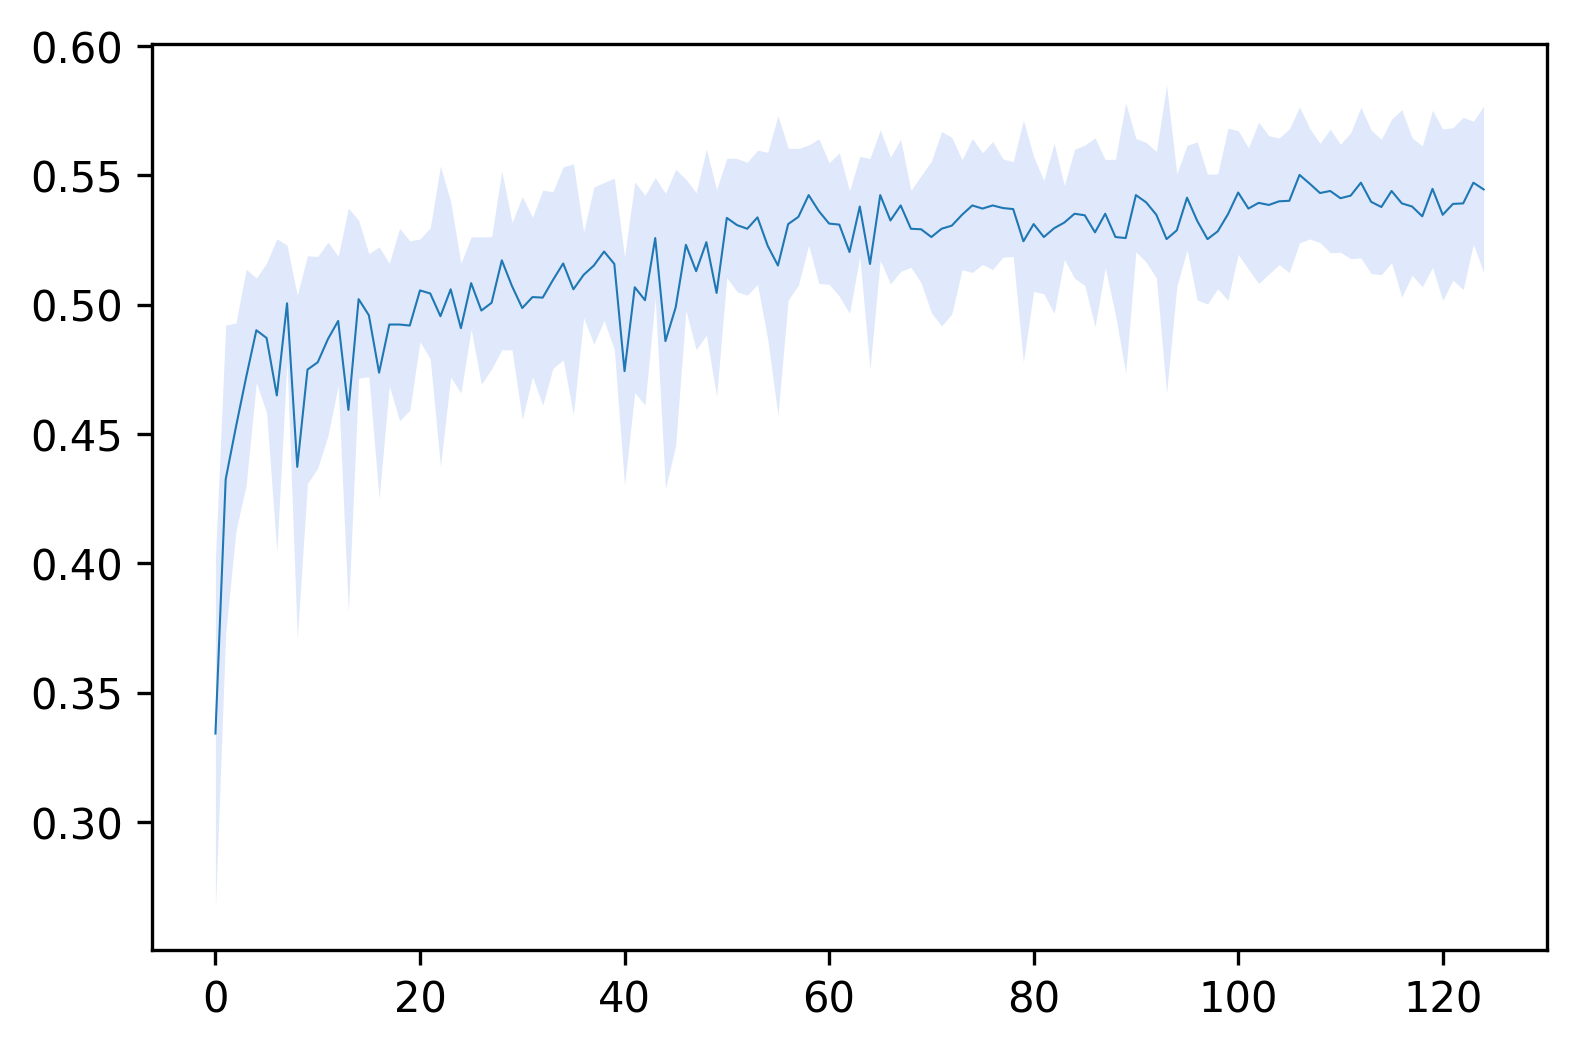

In [97]:
plot_curves(collect(curve_list, 'val'), agg=np.mean, err_agg=np.std)

In [100]:
print(np.mean(collect(curve_list, 'val'), 0)[np.argmax(np.mean(collect(curve_list, 'val'), 0))])
print(np.std(collect(curve_list, 'val'), 0)[np.argmax(np.mean(collect(curve_list, 'val'), 0))])

0.5501210420841683
0.026252702827812575


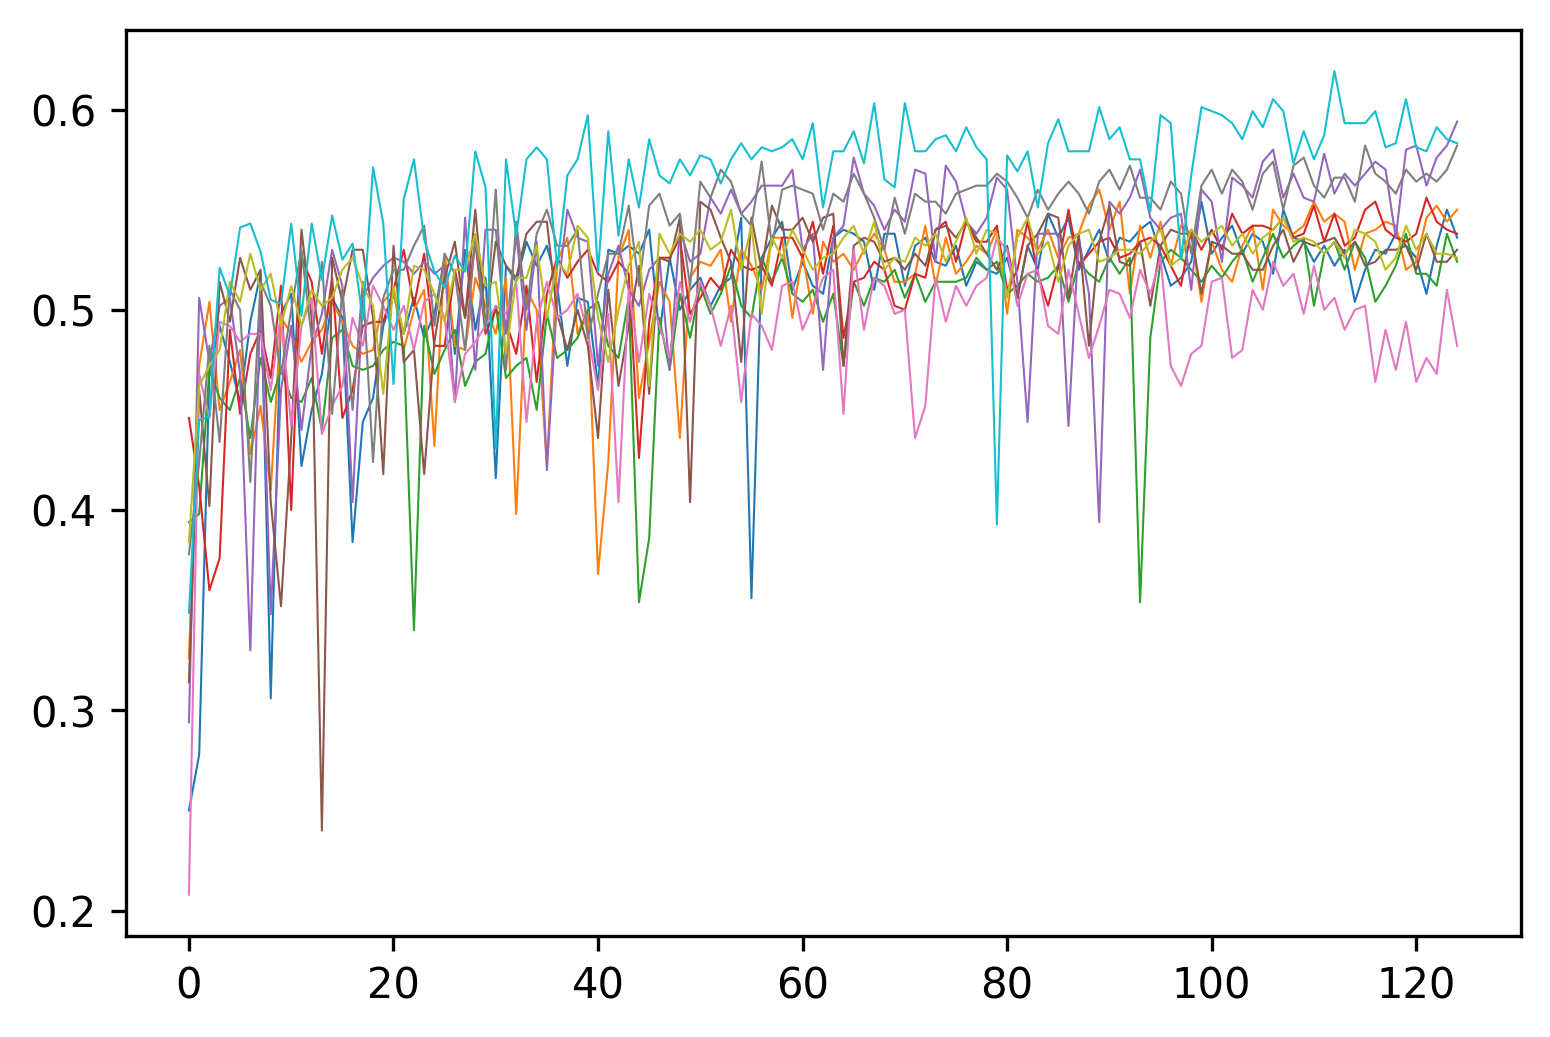

In [101]:
plot_curves(collect(curve_list, 'val'))

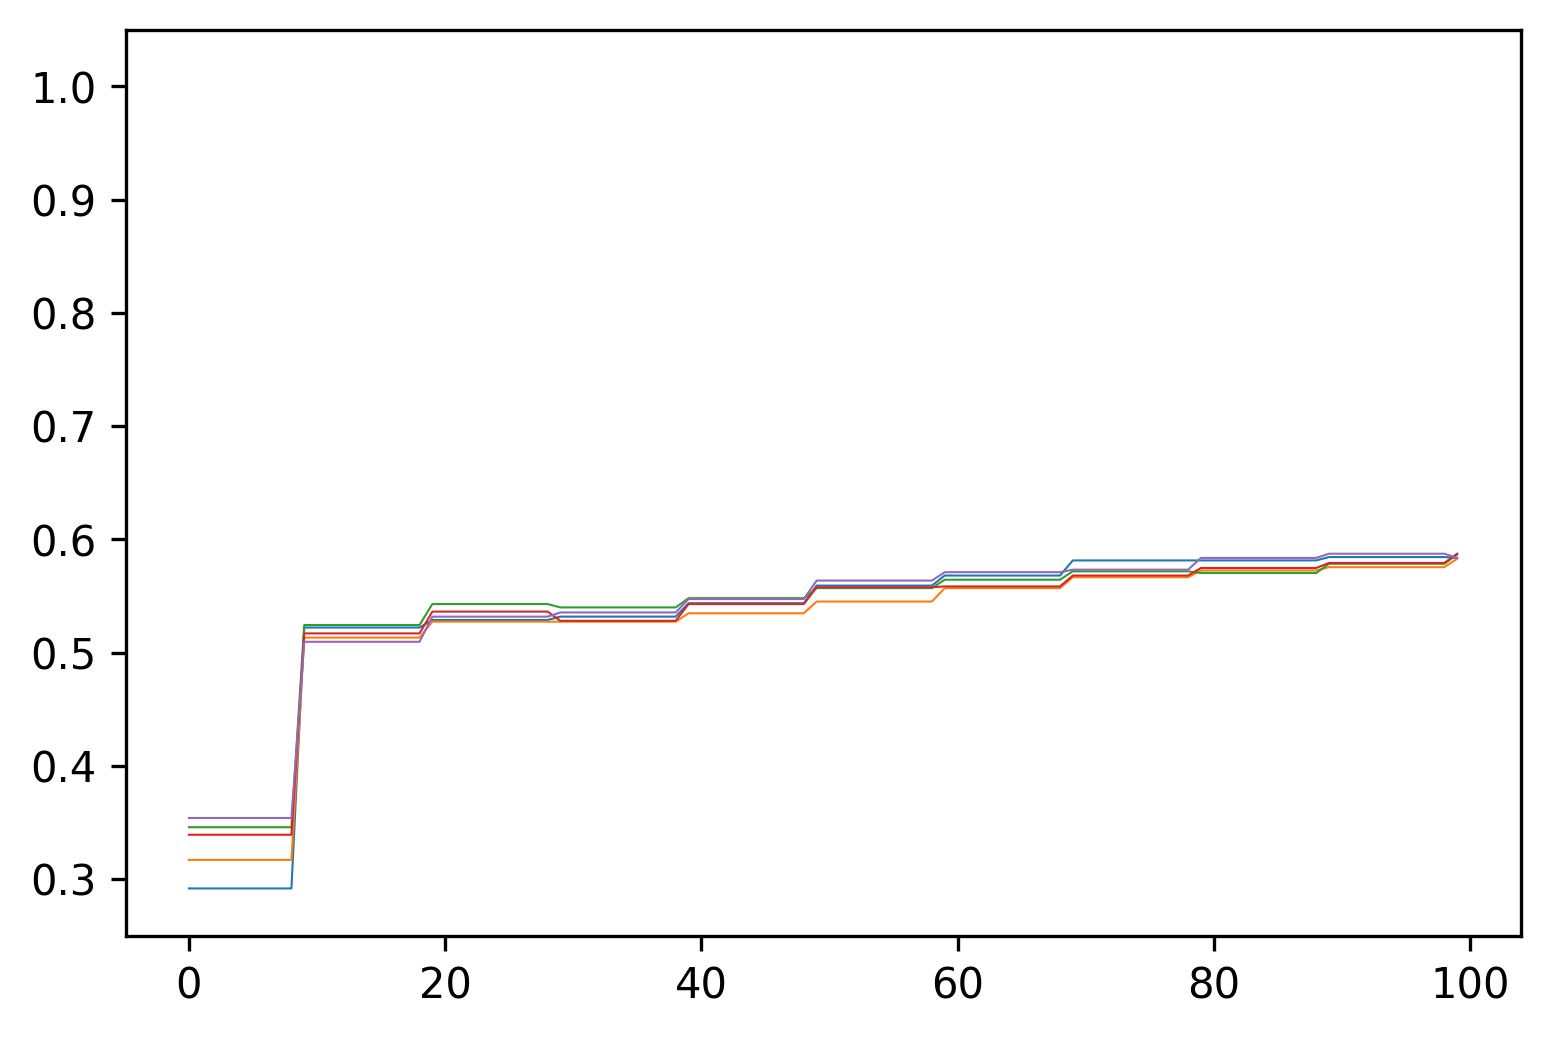

In [66]:
plot_curves(collect(curve_list, 'train'), ylim=[0.25, 1.05])